In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
!pip install matplotlib seaborn


  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [6]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0','Booking_ID'],inplace=True)

In [8]:
df.shape

(29020, 18)

In [9]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(21359, 18)

In [16]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

In [17]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [21]:
num_cols=[col for col in df.columns if df[col].dtype!='object']
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [19]:
len(num_cols)

14

In [20]:
len(cat_cols),len(num_cols)

(4, 14)

In [22]:
data=df.copy()

In [23]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [24]:
##UNIVARIATE ANALYSIS##
def numplot(df,num_features):
    plt.figure(figsize=(20,25))
    for i in range(len(num_features)):
        plt.subplot(6,3,i+1)
        sns.histplot(df[num_features[i]],kde=True)
        plt.xlabel(num_features[i])
    plt.show()

In [39]:

def num_dist_plot(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))

    # Ensure axes is always 2D
    if len(num_features) == 1:
        axes = np.expand_dims(axes, axis=0)  

    for i, column in enumerate(num_features):
        # Histogram
        sns.histplot(data=df, x=column, ax=axes[i, 0], kde=True, color='blue')
        axes[i, 0].set_title(f'Distribution of {column}')
        
        # Boxplot
        sns.boxplot(data=df, x=column, ax=axes[i, 1], color='lightblue')
        axes[i, 1].set_title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()
   
    

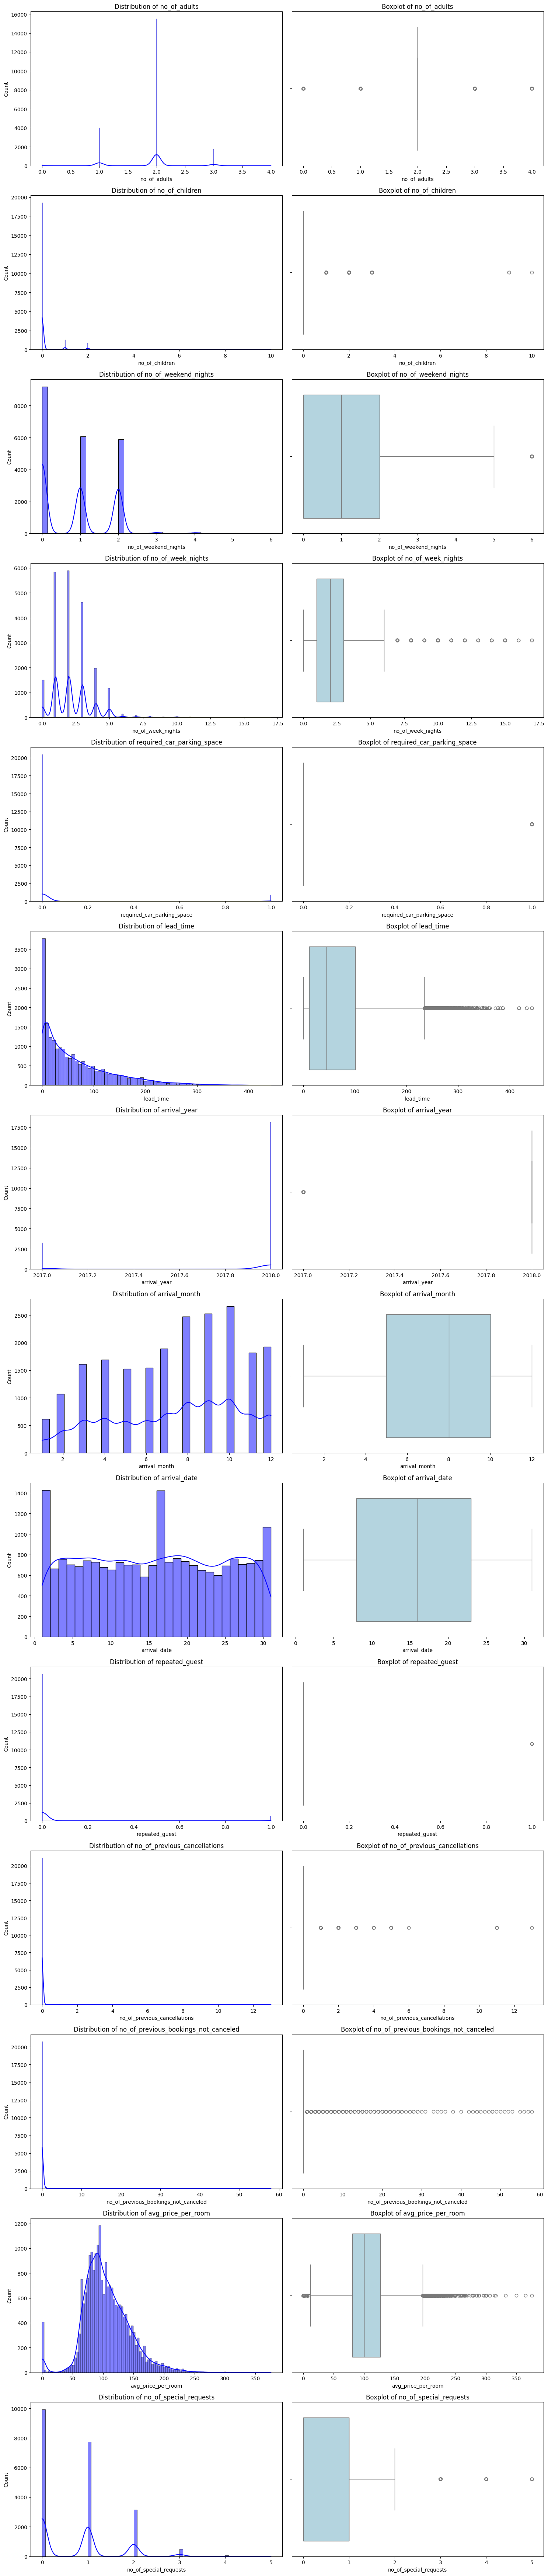

In [40]:
num_dist_plot(data,num_cols)

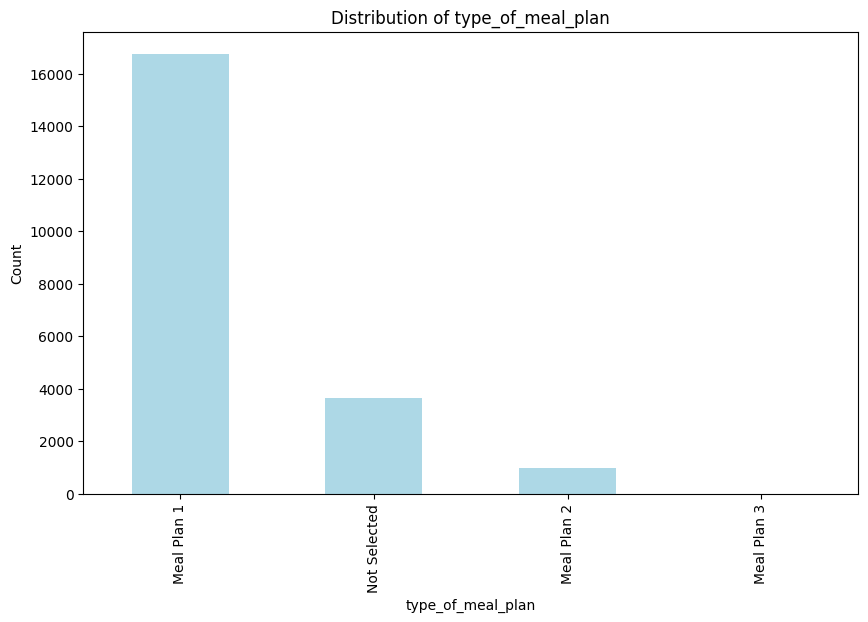

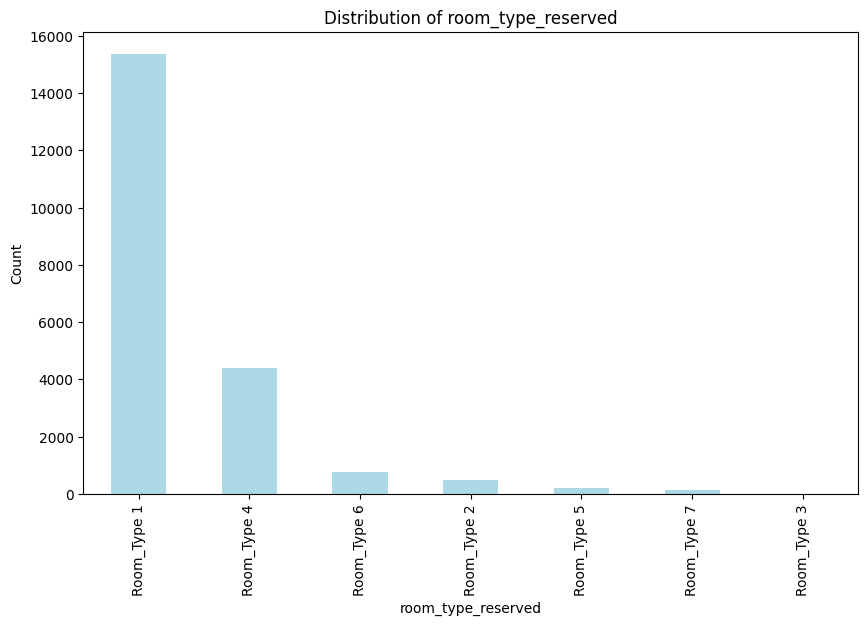

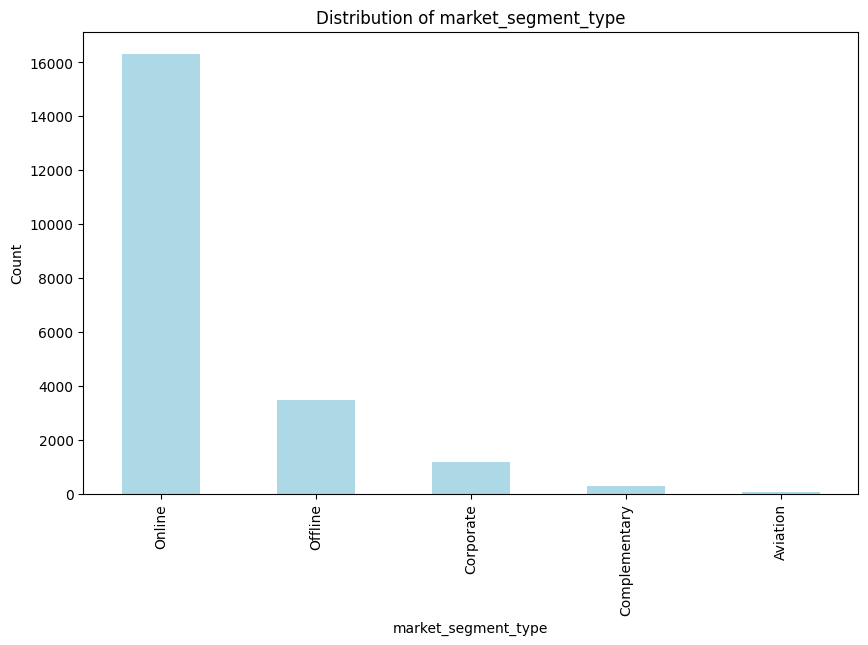

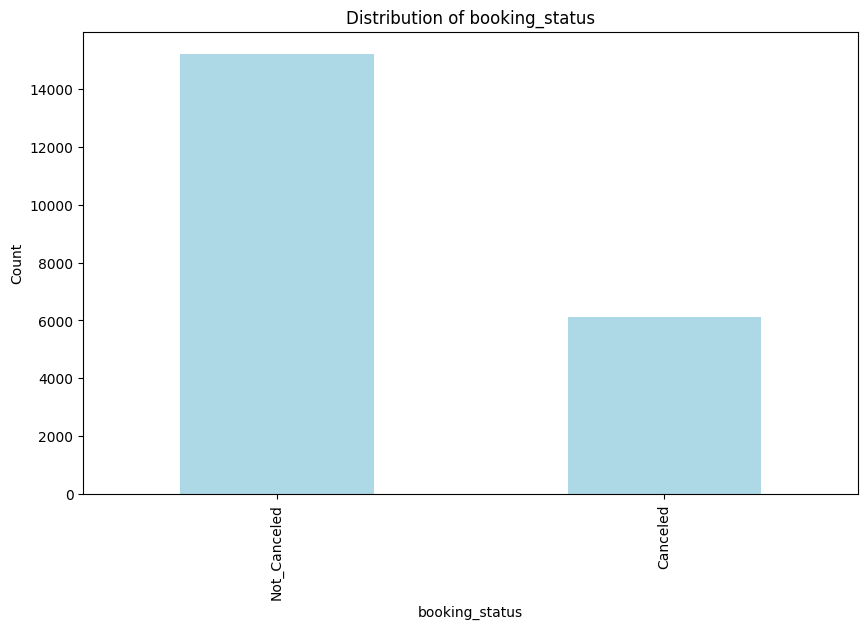

In [43]:
##categoraical columns##
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar',color='lightblue')
    plt.title(f'Distribution of {cat_feature}')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()
    
    

In [54]:
#Bivariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

def pivot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2   # 2 plots per row

    fig, axes = plt.subplots(num_rows, 2, figsize=(25, num_rows * 5))
    axes = axes.flatten()  # convert to 1D array for easy indexing

    for i, column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, palette='Blues', ax=axes[i])
        axes[i].set_title(f'{column} vs {target}', fontsize=14)

    # Hide any unused subplots (if num_plots is odd)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
   

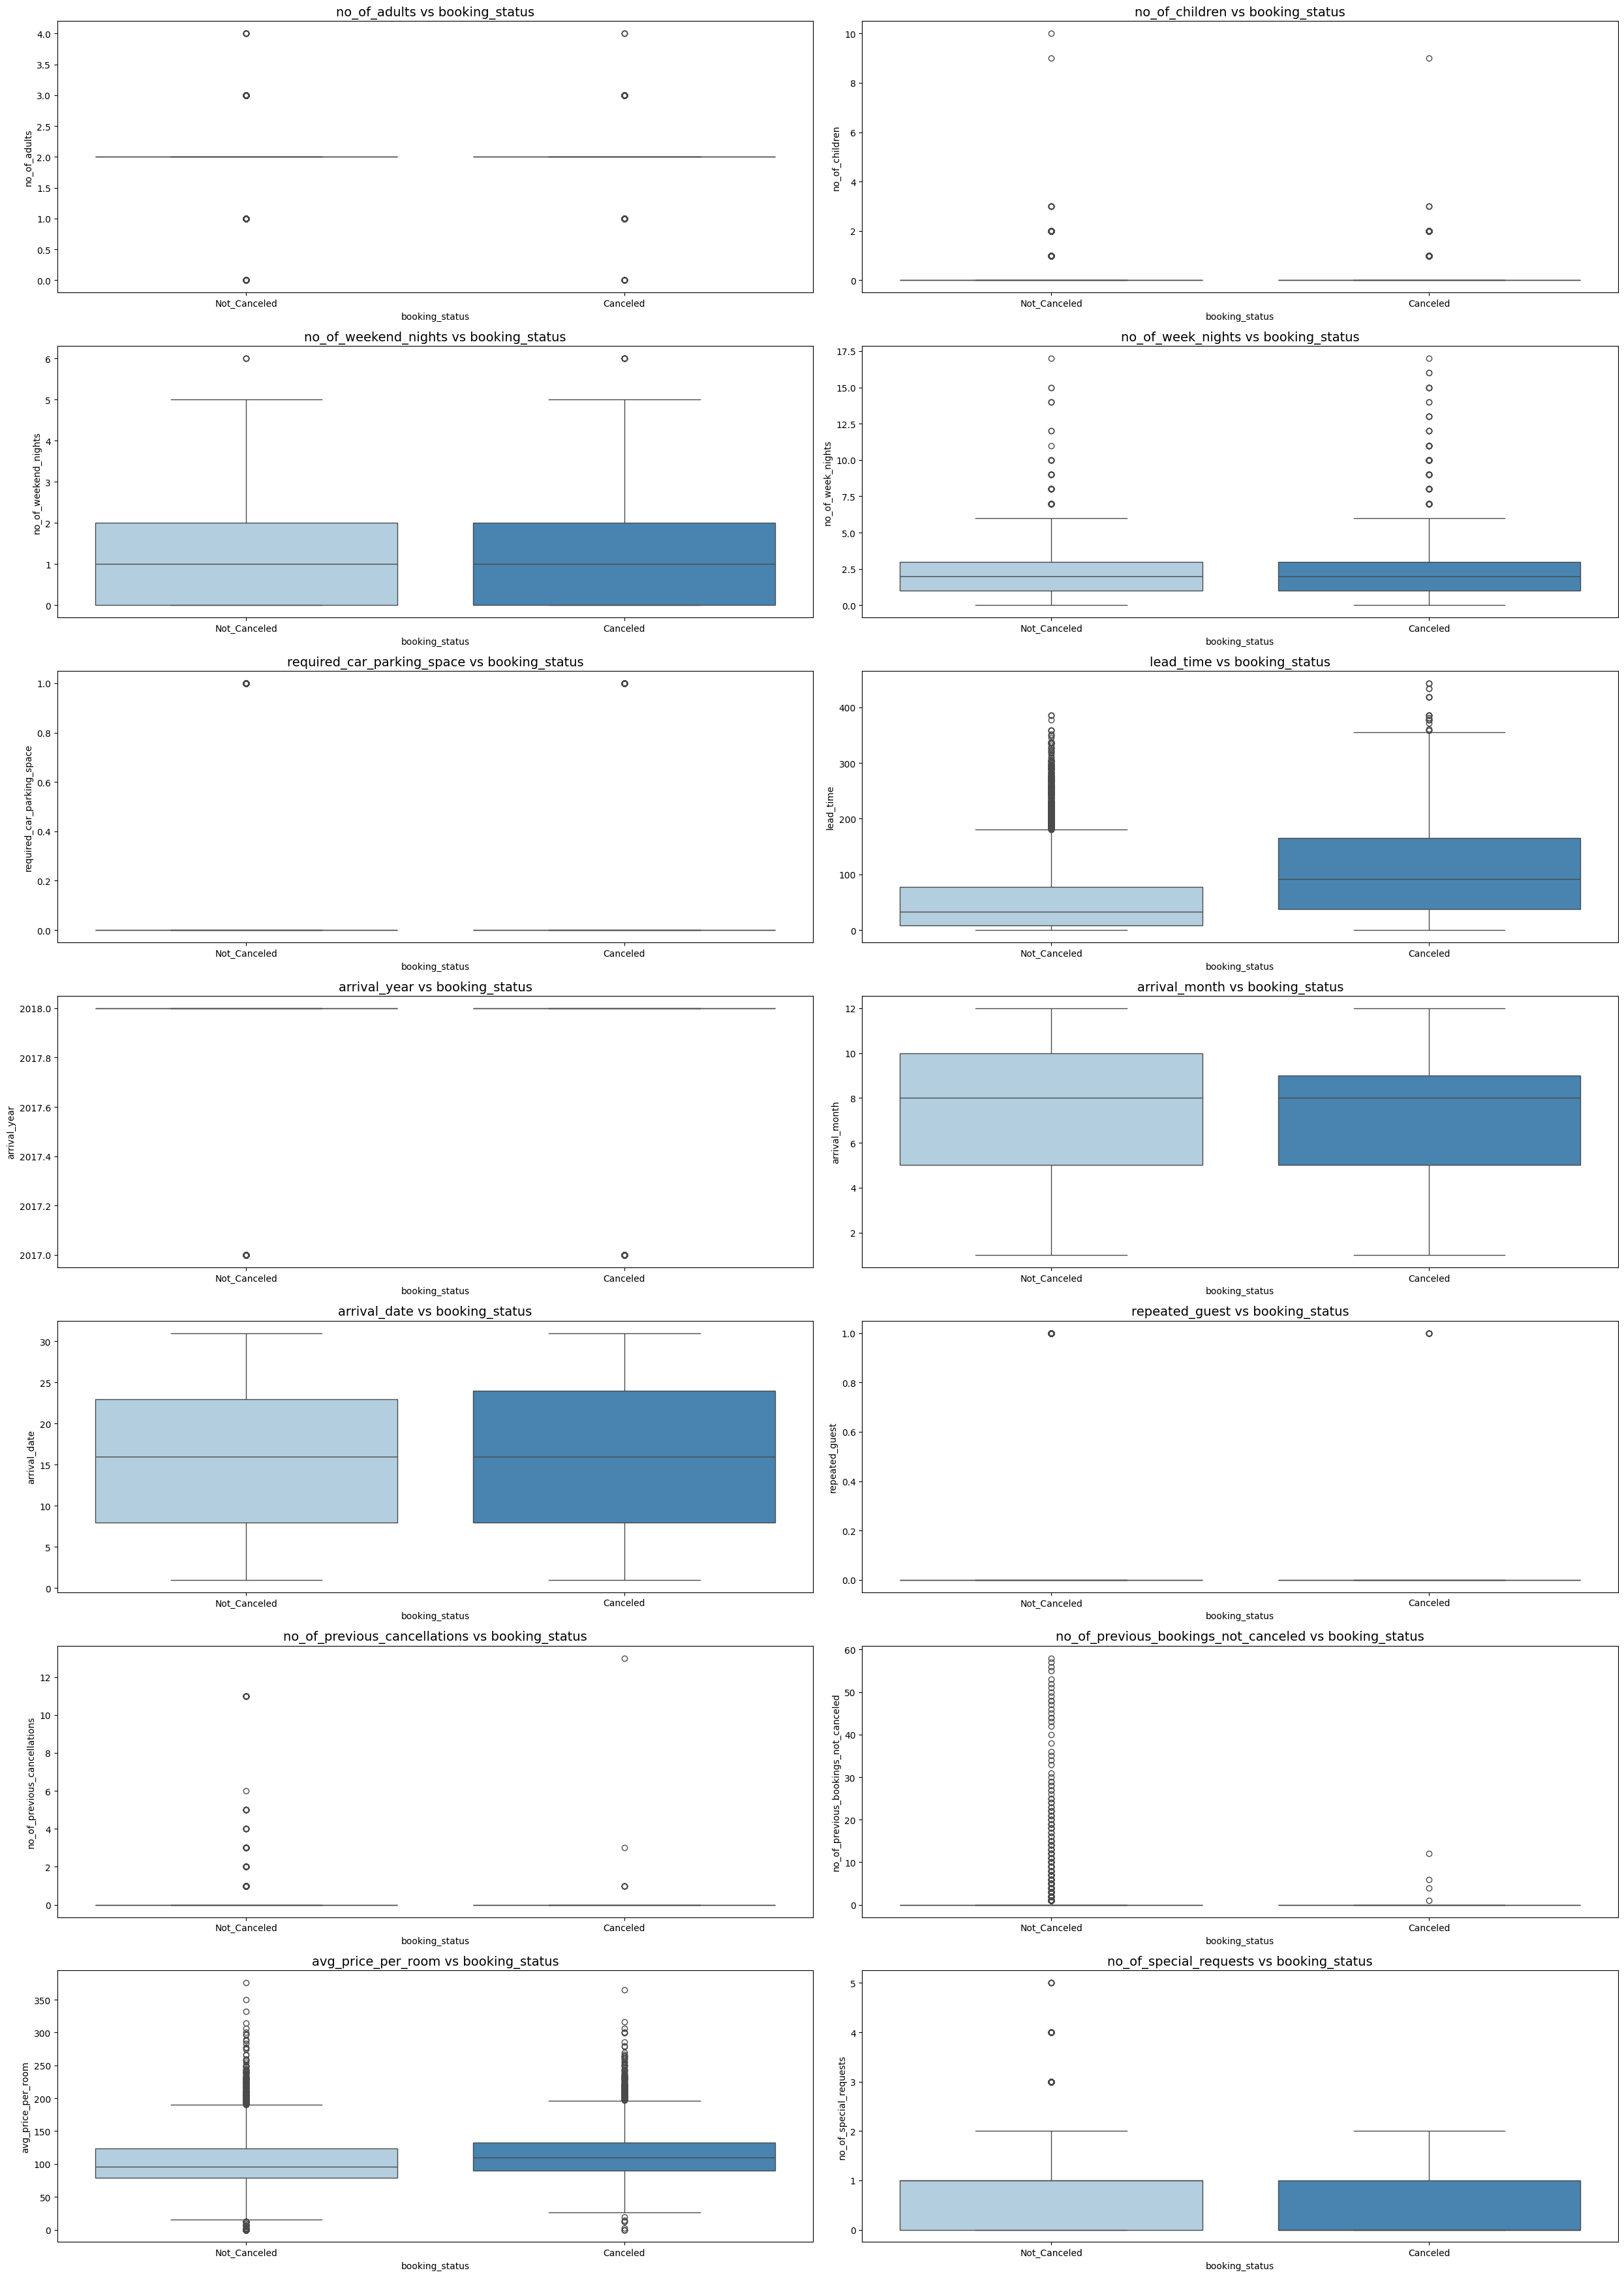

In [ ]:
#comparing target with numerical columns
plot_bivariate = pivot_bivariate_num(data,'booking_status',num_cols)

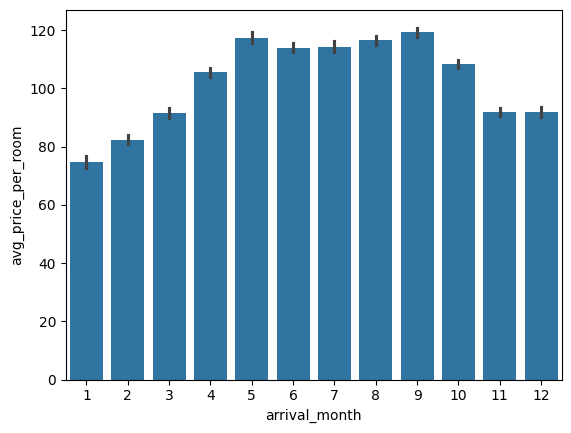

In [60]:
sns.barplot(x='arrival_month',y='avg_price_per_room',data=data)
plt.show()

In [70]:
def plot_bivariate_cat(df,target,cat_features):
    num_features=len(cat_features)
    no_rows=(num_features+1)//2
    fig,axes=plt.subplots(no_rows,2,figsize=(25,no_rows*5))
    axes=axes.flatten()
    for i,column in enumerate(cat_features):
        sns.countplot(data=data,x=column,hue=target,ax=axes[i],palette='Set2')
        axes[i].set_title(f'{column} vs {target}',fontsize=14)


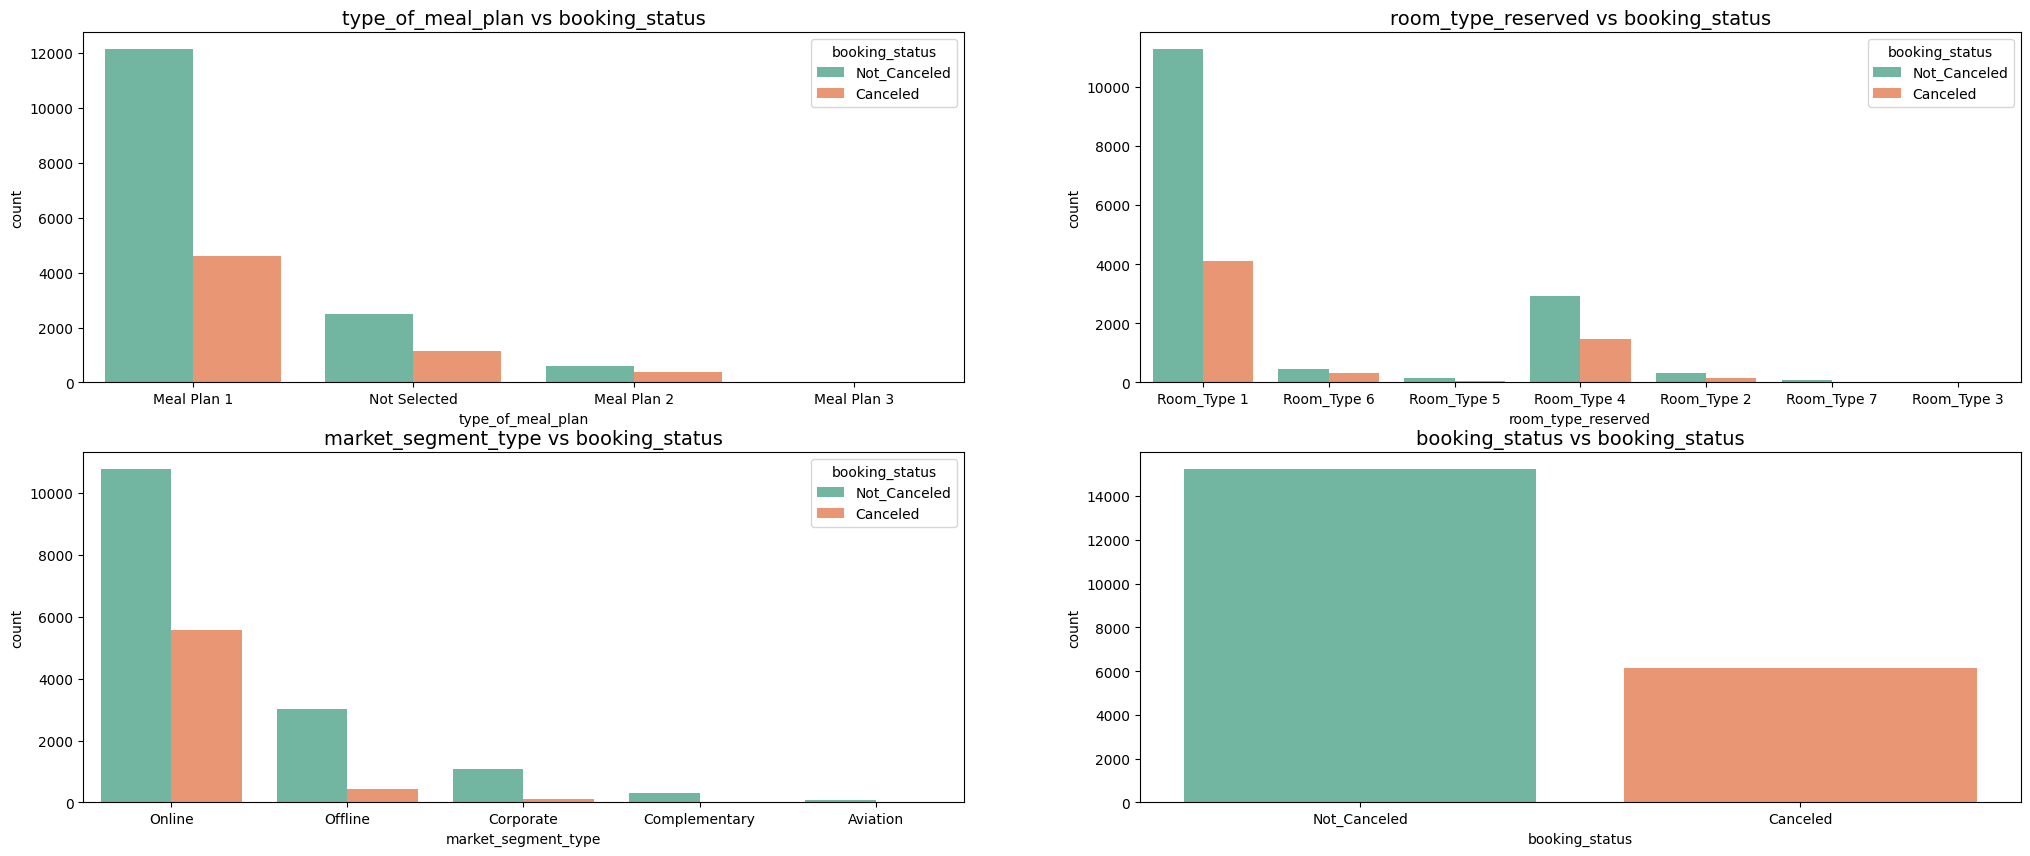

In [71]:
plot_bivariate_cat(data,'booking_status',cat_cols)

In [77]:
#data processingencoding
from sklearn.preprocessing import LabelEncoder

mappings = {}

for col in cat_cols:
    le = LabelEncoder()   # new encoder per column
    df[col] = le.fit_transform(df[col])
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [78]:
mappings


{'type_of_meal_plan': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [79]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [82]:
#multicolinearity
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.6 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.6 MB 1.0 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/9.6 MB 1.0 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.6 MB 798.0 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.6 MB 857.9 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.6 MB 857.9 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.6 MB 840.6 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.6 MB 840.6 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.6 MB 840.6 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.6 MB 840.6 kB/s eta 0:00:10
   ------ --


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#VIF >5 ignore 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
X = add_constant(df)  # adding a constant for VIF calculation
vif_data= pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by="VIF", ascending=False)


,feature,VIF
0,const,4.100197e+07
16,avg_price_per_room,1.926372e+00
13,repeated_guest,1.765576e+00
15,no_of_previous_bookings_not_canceled,1.712854e+00
12,market_segment_type,1.704297e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
14,no_of_previous_cancellations,1.396559e+00
18,booking_status,1.389308e+00
1,no_of_adults,1.341180e+00


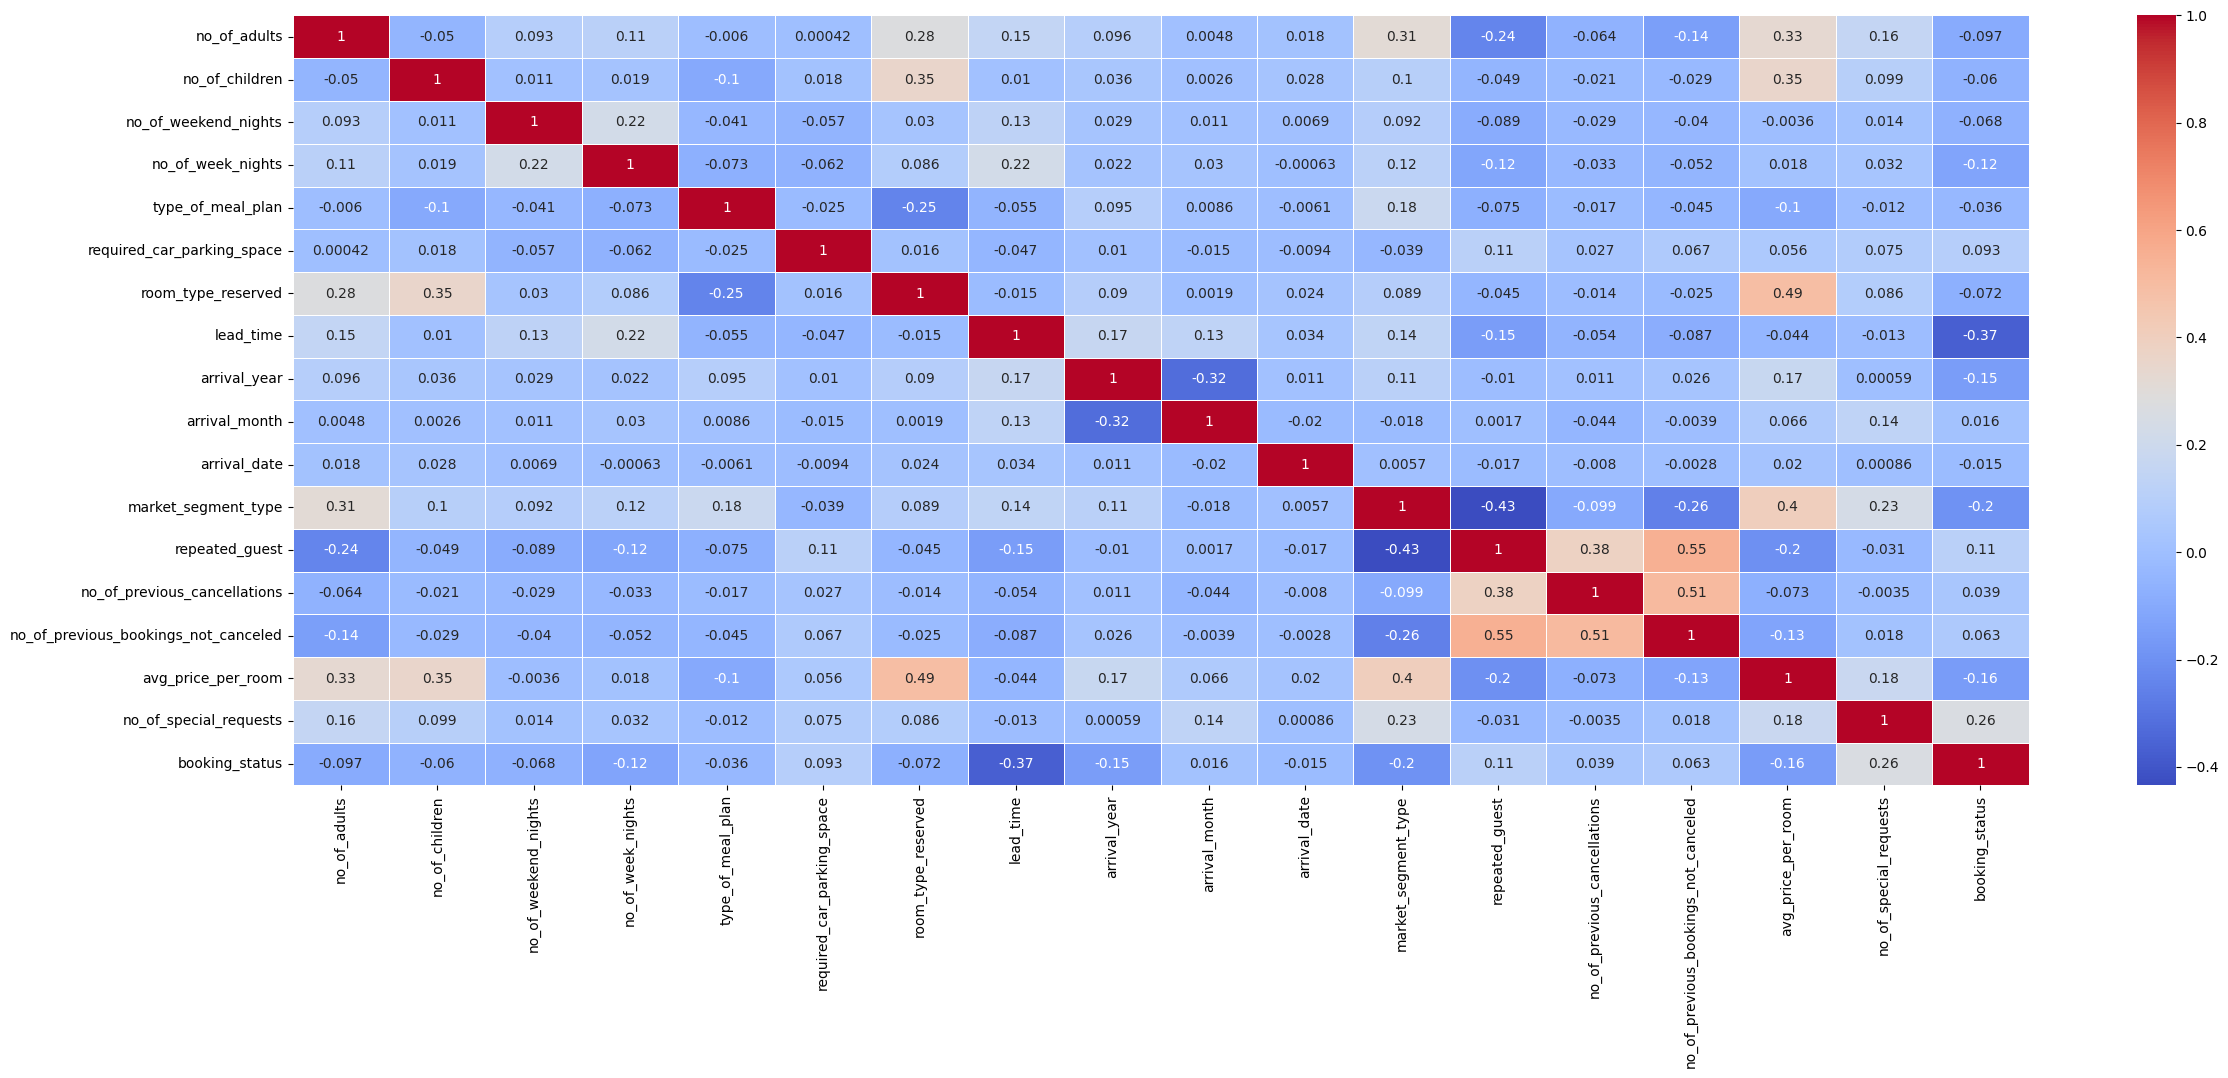

In [89]:
#data doesn't have multicolinearity issue
corr=df.corr()
plt.figure(figsize=(28,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.7)
plt.show()

In [93]:
#Squeness
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [92]:
for col in df.columns:
    if skewness[col]>5:
        df[col] = np.log1p(df[col])  # log1p to handle zero values

In [94]:
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [95]:
X=df.drop(columns=['booking_status'])
y=df['booking_status']

In [96]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [98]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)

In [99]:
X_res,y_res=smote.fit_resample(X,y)
X_res.shape,y_res.shape

((30462, 17), (30462,))

In [100]:
balanced_df=pd.DataFrame(X_res,columns=X.columns)
balanced_df['booking_status']=y_res

In [101]:
balanced_df.shape

(30462, 18)

In [102]:
df=balanced_df.copy()

In [103]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [104]:
X=df.drop(columns=['booking_status'])
y=df['booking_status']

In [105]:
model=RandomForestClassifier(random_state=42)
model.fit(X,y)
feature_importance=model.feature_importances_

In [106]:
feature_importance_df= pd.DataFrame({
    'Feature': X.columns,'importance': feature_importance
})

In [114]:
top_features_importance_df=feature_importance_df.sort_values(by='importance',ascending=False)
top_features_importance_df

,Feature,importance
7,lead_time,0.261824
16,no_of_special_requests,0.182032
15,avg_price_per_room,0.150638
9,arrival_month,0.086209
10,arrival_date,0.084072
11,market_segment_type,0.058509
3,no_of_week_nights,0.043996
2,no_of_weekend_nights,0.029981
4,type_of_meal_plan,0.020269
6,room_type_reserved,0.019697


In [115]:
top_10_features=top_features_importance_df['Feature'].head(10).values
top_10_df=df[top_10_features.tolist()+['booking_status']]

In [116]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [117]:
#model selection
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.1 MB/s eta 0:00:53
    --------------------------------------- 0.8/56.8 MB 1.2 MB/s eta 0:00:48
    --------------------------------------- 1.0/56.8 MB 1.2 MB/s eta 0:00:48
    --------------------------------------- 1.3/56.8 MB 1.2 MB/s eta 0:00:45
    --------------------------------------- 1.3/56.8 MB 1.2 MB/s eta 0:00:45
   - -------------------------------------- 1.8/56.8 MB 1.2 MB/s eta 0:00:45
   - -------------------------------------- 2.1/56.8 MB 1.3 MB/s eta 0:00:43
   - -------------------------------------- 2.4/56.8 MB 1.3 MB/s eta 0:00:44
   - -------------------------------------- 2.6/56.8 MB 1.2 MB/s eta 0:00:46
   - -------------------------------------- 2.6/56.8 MB 1.2 MB/s eta 0:00:46
   - ---------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier


In [119]:
X=df.drop(columns=['booking_status'])
y=df['booking_status']

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
classifiers = {
    "RandomForestClassifier":RandomForestClassifier(random_state=42),
    "LogisticRegression":LogisticRegression(random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=42),
    "SupportVectorClassifier":SVC(random_state=42),
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "XGBoost":XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42),
    "aDABOST":AdaBoostClassifier(random_state=42),
    "LightGBM":LGBMClassifier(random_state=42)}


In [130]:
metrics={
    "Model":[],
    "Accuracy":[],
    "Precision":[],
    "Recall":[],
    "F1-Score":[]}

In [131]:
for model_name, classifier in classifiers.items():   # <-- use .items() if dict
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [134]:
pd.DataFrame(metrics)

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.896931,0.896953,0.896931,0.896926
1,LogisticRegression,0.786312,0.786689,0.786312,0.786280
2,GradientBoostingClassifier,0.845232,0.845981,0.845232,0.845113
3,AdaBoostClassifier,0.799606,0.799815,0.799606,0.799596
4,SupportVectorClassifier,0.665682,0.671486,0.665682,0.662339
5,DecisionTreeClassifier,0.847858,0.848098,0.847858,0.847850
6,KNN,0.780568,0.794412,0.780568,0.778206
7,Naive Bayes,0.577056,0.724782,0.577056,0.496616
8,XGBoost,0.884622,0.884631,0.884622,0.884618
9,aDABOST,0.799606,0.799815,0.799606,0.799596


In [135]:
#Hyperparameter tuning for best model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



In [138]:
X=df.drop(columns=['booking_status'])
y=df['booking_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [139]:
rf=RandomForestClassifier(random_state=42)

In [140]:
params_dist={
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

In [141]:
randomsearch=RandomizedSearchCV(estimator=rf,param_distributions=params_dist,n_iter=30,cv=5,scoring='accuracy',n_jobs=-1,random_state=42)

In [142]:
randomsearch.fit(X_train,y_train)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....001EB60B516D0>, 'min_samples_leaf': <scipy.stats....001EB60BE0B00>, 'min_samples_split': <scipy.stats....001EB60B52E90>, ...}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [143]:
randomsearch.best_params_

{'bootstrap': False,
 'max_depth': 19,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 185}

In [144]:
best_rf_model=randomsearch.best_estimator_

In [145]:
y_pred=best_rf_model.predict(X_test)


In [146]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [148]:
print(accuracy,precision,recall,f1)

0.890858362054817 0.891087020587654 0.890858362054817 0.8908302805464807


In [ ]:
import joblib
joblib.dump(best_rf_model,'random_forest.pkl')


['random_forest.pkl']

In [ ]:
joblib.load("random_forest.pkl")
X_train[0:1]
